The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

Principal components(PC) are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

# HOW DO YOU DO A PRINCIPAL COMPONENT ANALYSIS?
step 1 : Standardize the range of continuous initial variables

step 2 : Compute the covariance matrix to identify correlations

step 3 : Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

step 4 : Create a feature vector to decide which principal components to keep

step 5 : Recast the data along the principal components axes

In [1]:
from sklearn import datasets
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [5]:
df.shape

(1797, 64)

Target is : 0


<Figure size 640x480 with 0 Axes>

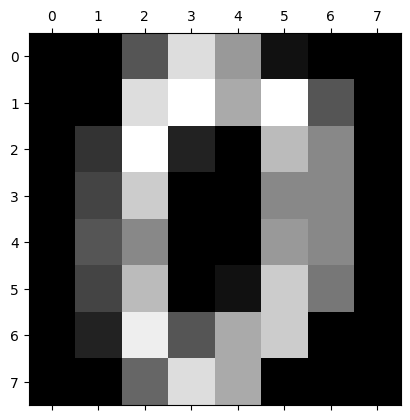

In [6]:
print("Target is :", dataset.target[0])
from matplotlib import pyplot as plt

plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))
plt.show()

In [7]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
df['Target'] = dataset.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [10]:
x = df
x.shape

(1797, 65)

In [11]:
y = dataset.target
y.shape

(1797,)

Standardization on our dataset
so mean will be 0 and variance will be 1

Standardization is useful when you want make a symmetric data so model can work properly.

if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,-1.567746
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,-1.218646
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,-0.869545
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,-0.520445
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,-0.171345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008,1.574157
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008,-1.567746
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008,1.225056
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008,1.574157


after finding the standardization we find the covariance matrix

-> It is a symmetric matrix that shows covariances of each pair of variables.

-> These values in the covariance matrix show the distribution magnitude and direction
   of multivariate data in multidimensional space. By controlling these values we can have     information about how data spread among two dimensions.

In [13]:
cov_mat = np.cov(X_scaled.T)  #---------------------------------------why we have transpose this????
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913,-0.051863
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569,-0.011843
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016,-0.011496
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469,0.100857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073,-0.196192
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137,-0.079144
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774,-0.114070
63,0.0,-0.043913,0.082569,0.082016,-0.215469,-0.167821,-0.080354,-0.024519,-0.005229,-0.001405,...,0.564303,-0.004628,-0.047115,0.031210,0.099727,0.103073,0.262137,0.620774,1.000557,-0.182030


In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [15]:
pd.DataFrame(eig_vals)

,0
0,7.344787
1,5.899764
2,5.163824
3,3.973668
4,2.987264
...,...
60,0.123930
61,0.130583
62,0.000000
63,0.000000


In [16]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182237,-0.042855,-0.027187,-0.180053,-0.039724,-0.198227,-0.070058,0.172512,0.225275,-0.059772,...,0.562304,0.135850,0.170141,-0.216619,-0.133790,-0.044909,-0.084265,0.0,0.0,0.0
2,0.285850,-0.058624,0.052941,-0.158471,-0.022230,-0.110539,0.008109,0.038947,0.121999,-0.007678,...,0.037639,-0.068372,0.009140,-0.075611,0.007390,-0.020067,-0.041767,0.0,0.0,0.0
3,0.220377,0.019781,0.040743,-0.166430,0.052872,0.096353,0.215186,-0.098451,-0.100870,0.021703,...,0.052701,0.078304,0.249187,0.226824,-0.102955,-0.191020,0.299809,0.0,0.0,0.0
4,-0.025253,-0.156829,0.060881,-0.003162,-0.134397,0.101930,-0.042911,0.014178,-0.091141,-0.005045,...,0.003964,-0.041775,-0.022484,-0.105186,0.038112,0.238791,-0.145965,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.017902,0.249446,0.071507,0.154802,-0.016465,-0.123606,-0.164511,0.022629,-0.156891,0.100386,...,-0.035301,-0.079032,0.003432,0.106560,-0.086219,-0.176124,-0.039540,0.0,0.0,0.0
61,0.103292,0.237106,0.033417,0.256280,0.092863,-0.054465,-0.021724,0.051948,-0.027772,0.036653,...,0.009359,0.043291,0.120601,-0.108651,0.086557,0.032017,0.032291,0.0,0.0,0.0
62,0.119899,0.166247,-0.093141,0.163778,0.230682,-0.082454,0.055675,-0.149913,0.129425,-0.057387,...,-0.010558,0.202328,0.016752,0.097524,0.103448,-0.055034,0.002446,0.0,0.0,0.0
63,0.071568,0.076852,-0.090868,0.116709,0.202854,-0.119442,-0.020626,-0.304548,0.193532,-0.029520,...,0.003043,-0.107540,-0.054845,-0.036883,-0.085069,0.002052,0.031723,0.0,0.0,0.0


In [17]:
#We will find explained variance to know how much percent of information my particular pc carries
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
var_exp

[11.839837653617867,
 9.510453831516292,
 8.324113357744086,
 6.405576010100879,
 4.815485963264097,
 4.238914396587588,
 3.8840521560775714,
 3.7345684726791126,
 2.95201705504967,
 2.884712394901674,
 2.7704127880432643,
 2.5872515136652856,
 2.2387151162722807,
 2.2282714480796595,
 2.1672535234911394,
 1.8936987942536065,
 1.7507480775115385,
 1.7356070643735808,
 1.5933962753252977,
 1.4656521833440013,
 1.329358952340761,
 1.2823827528596756,
 1.16230178048752,
 1.0516118037991196,
 1.0034524750729528,
 0.9383687526395533,
 0.8959589510973871,
 0.8361129329392101,
 0.8004309072520538,
 0.7415017502003913,
 0.7141326686200269,
 0.6818199929147841,
 0.6433639778800351,
 0.6316994003932574,
 0.5925258214862912,
 0.5633911941939805,
 0.5209818651995244,
 0.5057722914850962,
 0.4714997267285583,
 0.4389094070568943,
 0.4159919205433346,
 0.3906940213537183,
 0.3633234377582914,
 0.35057763735512965,
 0.33390016634801306,
 0.3092718154424066,
 0.29579169909504344,
 0.2802858344904609,


In [18]:
cum_var_exp = np.cumsum(var_exp)
pd.DataFrame(cum_var_exp)

,0
0,11.839838
1,21.350291
2,29.674405
3,36.079981
4,40.895467
...,...
60,99.918881
61,100.000000
62,100.000000
63,100.000000


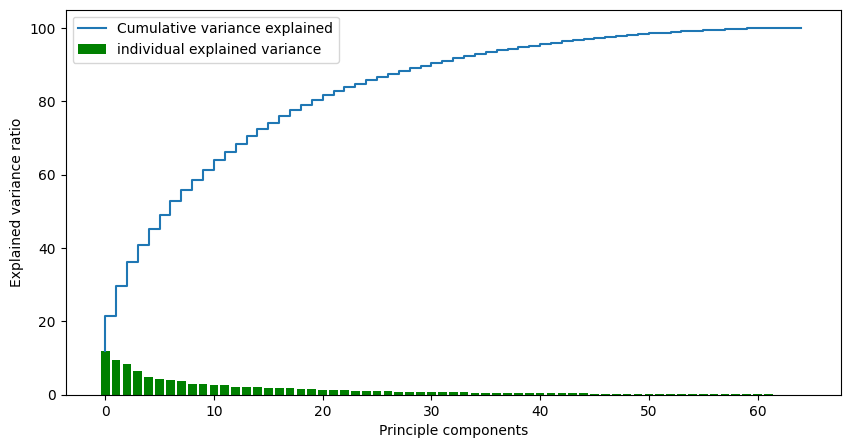

In [19]:
#This is the skree plot

plt.figure(figsize = (10,5))
plt.bar(range(len(var_exp)), var_exp, label = 'individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, label = 'Cumulative variance explained')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principle components")
plt.legend()
plt.show()

#Here we can choose by the graph our components may be 30 to 40....hit and trail

In [ ]:
# Now your data is prepared for training

# 1.split your data in train and test

# 2.use your model and pass the data in it

# 3.find the acccuracy

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 30)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 65)
(360, 65)
(1437,)
(360,)


In [22]:
#Now apply PCA

from sklearn.decomposition import PCA
pca = PCA(0.95) #Use n components which contains 95% of information about my dataset
X_pca = pca.fit_transform(x)


In [23]:
pca.explained_variance_ratio_

array([0.14793203, 0.13533877, 0.11736819, 0.08354533, 0.05760242,
       0.04997671, 0.043828  , 0.03644352, 0.03341269, 0.03073511,
       0.02374693, 0.02263179, 0.01818323, 0.01765767, 0.01457881,
       0.01404747, 0.0132791 , 0.01250013, 0.01017906, 0.00899757,
       0.00886366, 0.00811611, 0.00771277, 0.00724598, 0.00702086,
       0.00592083, 0.00572518, 0.00522757, 0.00486257])

In [24]:
pca.n_components_

29

In [25]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.115617,21.340689,-9.366337,12.903006,-7.882994,-8.213376,2.400515,2.446919,-0.535343,-3.429216,...,-3.528766,2.189979,0.749181,2.593165,0.752231,1.740233,2.346870,-3.696564,-0.668317,-1.177546
1,7.954812,-20.661232,4.777225,-14.963435,5.311104,-7.516289,1.405646,-4.703933,3.351154,0.551022,...,-4.965119,-2.213616,6.054959,-0.138715,-3.642189,3.295798,0.066955,-1.907229,-1.183745,2.320868
2,7.016666,-9.873053,3.194924,-12.361530,-18.394570,-3.658545,0.332189,-16.495245,0.129267,-4.504869,...,8.512222,5.127209,4.033712,4.082156,2.560806,-3.649726,0.212788,-4.272726,1.647600,0.904895
3,-15.837464,3.508200,9.925248,-12.276708,6.881995,0.241128,0.114860,11.309578,-3.360427,-6.293916,...,-3.841502,-0.067183,-1.790561,3.973788,-0.903941,-1.790677,-1.320117,5.444145,5.495962,-1.053501
4,23.325276,4.161895,-5.705105,-13.872725,-0.568130,-3.100607,-0.529602,13.247984,-3.865148,-12.710492,...,4.780362,1.283749,-7.749933,-4.519581,0.304650,5.595002,-0.109352,-0.712326,1.226892,-3.298136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-14.668819,13.189709,-13.714008,-6.437745,4.133238,-1.068907,-5.848109,-4.297796,7.678699,8.176939,...,1.473271,1.948289,-1.897211,0.996337,1.712562,1.522650,-2.401566,-4.908992,-0.551965,-2.769625
1793,6.612985,20.615091,-9.047800,12.427272,-10.038915,-14.136308,1.558240,-3.970828,-6.801148,5.697044,...,-0.059648,-4.064230,1.010639,-1.119359,0.515149,2.537646,-1.154129,0.105707,-0.317073,-3.488843
1794,10.732405,-7.048626,5.468993,-7.173353,-3.478439,-9.820969,-8.024418,-7.912455,-3.062058,13.771860,...,2.263904,0.006527,-5.376702,0.777058,4.711539,-3.257662,4.475192,3.306304,2.236130,3.574053
1795,-4.930524,12.249613,-10.473960,-6.591258,4.017761,1.390380,-3.968299,-4.713968,4.470777,12.960086,...,0.051789,1.131586,4.060520,3.277504,-4.110231,2.702831,-2.751940,-2.924500,-0.465503,-0.846578


In [26]:
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size = 0.2, random_state = 30)

In [27]:
#From logistic after PCA model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.975

In [28]:
#Lets now select only 2 components
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x)
X_pca.shape

(1797, 2)

In [29]:
X_train_pca, X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=30)
model = LogisticRegression(max_iter= 1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.6083333333333333

In [30]:
x_train_D,x_test_D,y_train_D,y_test_D= train_test_split(X_scaled,y,test_size = 0.2, random_state = 30)

In [31]:
pca = PCA(n_components=40)
pca_x_train_D = pca.fit_transform(x_train_D)
pca_x_test_D = pca.transform(x_test_D)
pca_x_train_D.shape

(1437, 40)

In [32]:
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier().fit(pca_x_train_D,y_train_D)
predicted = rf.predict(pca_x_test_D)
predicted  #this is the predicted values

array([8, 9, 6, 5, 5, 8, 3, 1, 1, 2, 3, 8, 1, 2, 9, 1, 5, 1, 8, 8, 8, 0,
       5, 0, 5, 5, 7, 2, 0, 5, 5, 5, 8, 4, 8, 8, 3, 2, 9, 4, 9, 1, 5, 3,
       4, 6, 8, 6, 0, 9, 4, 9, 4, 4, 4, 2, 6, 2, 5, 5, 8, 6, 9, 6, 9, 7,
       3, 8, 4, 1, 4, 8, 0, 1, 6, 7, 6, 2, 5, 7, 8, 5, 2, 3, 4, 6, 9, 2,
       4, 5, 2, 9, 8, 0, 4, 2, 5, 4, 1, 2, 7, 8, 6, 8, 1, 0, 6, 0, 1, 0,
       3, 1, 6, 3, 4, 1, 4, 6, 7, 2, 0, 9, 1, 2, 5, 6, 9, 8, 8, 4, 5, 0,
       2, 4, 0, 6, 1, 4, 1, 1, 8, 7, 9, 4, 0, 4, 3, 6, 7, 2, 6, 1, 6, 6,
       7, 2, 1, 3, 4, 0, 9, 7, 2, 2, 0, 9, 4, 7, 6, 8, 5, 6, 0, 1, 1, 1,
       4, 9, 5, 6, 5, 9, 0, 2, 7, 3, 6, 2, 3, 7, 7, 4, 0, 8, 5, 1, 1, 7,
       6, 3, 5, 3, 2, 6, 5, 6, 9, 4, 4, 1, 0, 2, 7, 1, 8, 5, 8, 7, 8, 7,
       0, 6, 8, 7, 3, 1, 3, 1, 7, 1, 3, 0, 3, 6, 4, 9, 0, 8, 6, 2, 2, 0,
       3, 2, 8, 7, 1, 4, 8, 0, 6, 6, 7, 2, 2, 8, 6, 9, 6, 2, 4, 5, 9, 9,
       1, 1, 3, 9, 6, 7, 6, 6, 4, 0, 2, 4, 3, 2, 2, 1, 7, 7, 5, 5, 3, 6,
       5, 8, 8, 4, 6, 3, 9, 2, 8, 3, 5, 7, 1, 0, 7,

In [33]:
y_test_D #these are your actual values

array([8, 1, 6, 5, 3, 8, 3, 2, 1, 2, 5, 8, 1, 2, 4, 1, 5, 1, 8, 3, 1, 0,
       5, 0, 3, 5, 4, 1, 0, 5, 2, 5, 8, 7, 5, 8, 3, 2, 9, 4, 9, 0, 5, 3,
       1, 6, 9, 6, 0, 9, 4, 9, 4, 4, 4, 2, 6, 2, 5, 5, 8, 6, 9, 6, 9, 7,
       3, 8, 4, 1, 4, 8, 0, 1, 6, 1, 6, 2, 5, 7, 8, 5, 9, 2, 7, 6, 9, 2,
       4, 5, 5, 8, 8, 0, 1, 2, 5, 4, 1, 2, 7, 8, 6, 8, 1, 0, 6, 0, 1, 0,
       3, 1, 5, 3, 4, 1, 4, 6, 7, 2, 0, 9, 1, 2, 5, 6, 8, 8, 8, 1, 5, 0,
       2, 4, 0, 6, 0, 4, 1, 2, 8, 7, 9, 4, 0, 4, 3, 6, 7, 2, 6, 1, 6, 6,
       7, 2, 1, 3, 4, 0, 9, 7, 2, 2, 0, 7, 4, 7, 6, 8, 5, 6, 0, 1, 1, 1,
       4, 8, 2, 6, 5, 4, 0, 2, 7, 3, 6, 2, 3, 7, 7, 4, 0, 8, 5, 1, 1, 7,
       6, 3, 5, 3, 2, 9, 9, 9, 9, 4, 4, 1, 0, 2, 7, 1, 8, 4, 8, 7, 3, 7,
       0, 6, 8, 7, 3, 1, 3, 3, 7, 1, 3, 0, 3, 6, 4, 9, 0, 9, 6, 2, 2, 0,
       4, 2, 8, 7, 1, 4, 8, 0, 6, 6, 7, 2, 2, 8, 6, 9, 6, 2, 4, 5, 9, 9,
       1, 1, 8, 9, 6, 7, 5, 6, 4, 0, 2, 4, 3, 2, 2, 1, 7, 7, 5, 5, 5, 2,
       5, 8, 8, 4, 6, 9, 9, 2, 1, 3, 5, 7, 1, 0, 7,

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(predicted,y_test_D)

0.8472222222222222

In [35]:
confusion_matrix(predicted,y_test_D)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 36,  2,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 34,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  2, 20,  1,  2,  0,  0,  1,  2],
       [ 0,  3,  0,  0, 30,  0,  0,  2,  0,  0],
       [ 0,  0,  2,  2,  1, 32,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0,  2, 42,  0,  0,  2],
       [ 0,  2,  0,  0,  1,  0,  0, 27,  0,  0],
       [ 0,  2,  0,  3,  0,  1,  0,  1, 30,  3],
       [ 0,  2,  0,  0,  2,  0,  0,  2,  3, 21]])